In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import glob
import os
from FillBetween3d import fill_between_3d
import matplotlib_style
from matplotlib import patches
import seaborn as sns

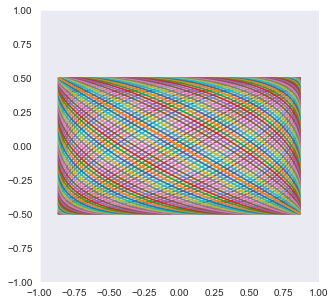

In [40]:
t = np.linspace(0, 2*np.pi, 100)
theta = np.pi/6
delta = np.arange(0, np.pi+0.001, np.pi/50)
E0 = np.exp(1.0j * t)
J = np.array([1, 0]).reshape((-1, 1))
K = np.array([0,1]).reshape((-1, 1))
Ein = E0 * (np.cos(theta) * J + np.sin(theta) * K)

plt.figure(figsize=(5,5))
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.plot(Ein[0,:].real, Ein[1,:].real)
for d in delta:
    cm = np.array([np.exp(-1.0j * d/2), np.exp(1.0j*d/2)]).reshape((-1, 1))
    Eout = Ein * cm
    plt.plot(Eout[0,:].real, Eout[1,:].real)
plt.grid(False)

In [55]:
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['axes.facecolor'] = "none"
ax = plt.figure().add_subplot(projection='3d')
z1 = np.linspace(0, 7.0*np.pi, 100)
z2 = np.linspace(z1[-1], z1[-1] + 4.0*np.pi, 100)
z3 = np.linspace(z2[-1], z2[-1] + 7.0*np.pi, 100)
z = np.hstack([z1, z2, z3])
E0 = 1.0
a = 0.50 * E0
b = E0 - a
k = 0.3
rcp1 = a * np.exp(1.0j * z1) * np.array([1, 1.0j]).reshape((-1, 1))
lcp1 = b * np.exp(1.0j * z1) * np.array([1, -1.0j]).reshape((-1, 1))

rcp2 = a * np.exp(1.0j * z2) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * (z2-z2[0])/15)
lcp2 = b * np.exp(1.0j * z2) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * -(z2-z2[0])/15)

rcp3 = a * np.exp(1.0j * z3) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * (z2[-1]-z2[0])/15)
lcp3 = b * np.exp(1.0j * z3) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * -(z2[-1]-z2[0])/15)

rcp = np.hstack([rcp1, rcp2, rcp3])
lcp = np.hstack([lcp1, lcp2, lcp3])

tot = rcp + lcp

ax.plot(z, tot[1,:].real, tot[0,:].real, color="red")
set1 = [z, tot[1,:].real, tot[0,:].real]
set2 = [z, 0*tot[1,:].real, 0*tot[0,:].real]
fill_between_3d(ax, *set1, *set2, c="red", alpha=0.2)

rcp1 = a * np.exp(1.0j * z1) * np.array([1, 1.0j]).reshape((-1, 1))
lcp1 = b * np.exp(1.0j * z1) * np.array([1, -1.0j]).reshape((-1, 1))

rcp2 = a * np.exp(1.0j * z2) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * -(z2-z2[0])/15)
lcp2 = b * np.exp(1.0j * z2) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * (z2-z2[0])/15)

rcp3 = a * np.exp(1.0j * z3) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * -(z2[-1]-z2[0])/15)
lcp3 = b * np.exp(1.0j * z3) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp((1.0j - k) * (z2[-1]-z2[0])/15)

rcp = np.hstack([rcp1, rcp2, rcp3])
lcp = np.hstack([lcp1, lcp2, lcp3])

tot = rcp + lcp

ax.plot(z, tot[1,:].real + 2, tot[0,:].real, color="red")
set1 = [z, tot[1,:].real+2, tot[0,:].real]
set2 = [z, 0*tot[1,:].real+2, 0*tot[0,:].real]
fill_between_3d(ax, *set1, *set2, c="red", alpha=0.2)

x = [-1,1]
y = [-1,1]
X,Y = np.meshgrid(x,y)
One = np.ones_like(X)

alpha = 0.3
color1 = '#fde614'
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y, One, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y, -One, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], One, Y, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], -One, Y, alpha=alpha, color=color1)
ax.plot_surface(One * z2[0], X, Y, alpha=alpha, color=color1)
ax.plot_surface(One * z2[-1], X, Y, alpha=alpha, color=color1)

color2 = "#441753"

ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y+2, One, alpha=alpha, color=color2)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y+2, -One, alpha=alpha, color=color2)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], One+2, Y, alpha=alpha, color=color2)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], -One+2, Y, alpha=alpha, color=color2)
ax.plot_surface(One * z2[0], X+2, Y, alpha=alpha, color=color2)
ax.plot_surface(One * z2[-1], X+2, Y, alpha=alpha, color=color2)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax.axis("off")

#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)
ax.view_init(elev=35, azim=-48)

In [2]:
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(2, 1, figsize=(5,10))
axes[0].plot(rcp1[0,:].real, rcp1[1,:].real, label="RCP", alpha=0.5)
axes[0].plot(lcp1[0,:].real, lcp1[1,:].real, label="LCP", alpha=0.5)
axes[0].plot((rcp1+lcp1)[0,:].real, (rcp1+lcp1)[1,:].real, label="RCP+LCP")
axes[0].set_xlim(-1, 1)
axes[0].set_ylim(-1, 1)
axes[0].set_aspect('equal')
axes[0].set_xlabel(r"$E_x$")
axes[0].set_ylabel(r"$E_y$")


axes[1].plot(rcp3[0,:].real, rcp3[1,:].real, alpha=0.5)
axes[1].plot(lcp3[0,:].real, lcp3[1,:].real, alpha=0.5)
axes[1].plot((rcp3+lcp3)[0,:].real, (rcp3+lcp3)[1,:].real)
axes[1].set_xlim(-1, 1)
axes[1].set_ylim(-1, 1)
axes[1].set_aspect('equal')
axes[1].set_xlabel(r"$E_x$")
axes[1].set_ylabel(r"$E_y$")
fig.legend()
fig.tight_layout()
fig.savefig("images/test4.svg", dpi=300)

NameError: name 'rcp1' is not defined

In [21]:
x = np.linspace(-5, 5, 100)
i = np.linspace(-5, 5, 100)

def f(x):
    return x**5 + -3*x**4 + -2*x**3 + x**2 + x -1

y = f(x)
g = f(i*1.0j)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, 0)
ax.plot(0*i, g, i)
ax.view_init(elev=90, azim=-90)

/Users/takumi/miniforge3/envs/tensorflow25/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [6]:
input_dim = (100, 100)
width = min(int(np.floor(input_dim[1] / 9.0)), int(np.floor(input_dim[0] / 7.0)))
height = min(int(np.floor(input_dim[1] / 9.0)), int(np.floor(input_dim[0] / 7.0)))

filter = np.zeros((input_dim[-2], input_dim[-1]), dtype='float32')
filter[2 * height:3 * height, width:2 * width] = 1.0
filter[2 * height:3 * height, 4 * width:5 * width] = 1.0
filter[2 * height:3 * height, 7 * width:8 * width] = 1.0
filter[4 * height:5 * height, 1 * width:2 * width] = 1.0
filter[4 * height:5 * height, 3 * width:4 * width] = 1.0
filter[4 * height:5 * height, 5 * width:6 * width] = 1.0
filter[4 * height:5 * height, 7 * width:8 * width] = 1.0
filter[6 * height:7 * height, width:2 * width] = 2.0
filter[6 * height:7 * height, 4 * width:5 * width] = 1.0
filter[6 * height:7 * height, 7 * width:8 * width] = 1.0


plt.rcParams["font.size"] = 22
plt.figure()
plt.axis("off")
plt.imshow(filter, cmap="rocket")
plt.text(13,20, "0", color="white")
plt.text(46,20, "1", color="white")
plt.text(79,20, "2", color="white")
plt.text(13,42, "3", color="white")
plt.text(35,42, "4", color="white")
plt.text(57,42, "5", color="white")
plt.text(79,42, "6", color="white")
plt.text(12,64, "7", color="white")
plt.text(46,64, "8", color="white")
plt.text(79,64, "9", color="white")

Text(79, 64, '9')

In [8]:
(47.9/-27.5) * (217.3-201.3) + 93.8

65.9309090909091

In [2]:
images = np.load("data/np_save.npy")

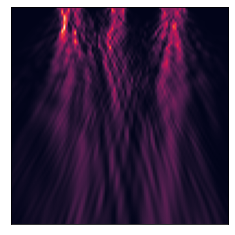

In [14]:
fig, ax = plt.subplots(1,1)
ax.imshow(images[:,:,50], cmap="rocket")
ax.set_aspect(1./ax.get_data_ratio())
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticks([],color="None")
ax.set_yticks([],color="None")
fig.savefig("images/diff12.png", transparent=True, dpi=300)

/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_53587/3705326086.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(XX, YY, domain2, cmap="rocket")


([], [])

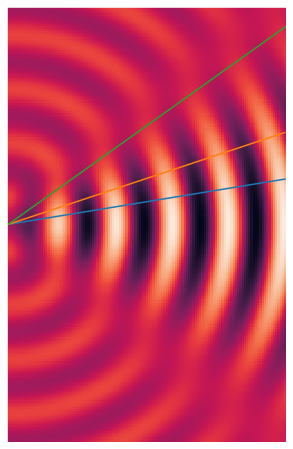

In [20]:
x = np.linspace(0, np.pi*10, 125)
y = np.linspace(-np.pi*8, np.pi*8, 200)

XX, YY = np.meshgrid(x, y)
R = np.sqrt(XX**2 + YY**2)
d2 = np.pi*3

domain1_y = np.linspace(-np.pi*4, -np.pi*3, 20)
domain2_y = np.linspace(-d2/2, d2/2, 20)
domain3_y = np.linspace(np.pi*3, np.pi*4, 20)
domain1 = np.zeros_like(R)
domain2 = np.zeros_like(R)
domain3 = np.zeros_like(R)

for y in domain1_y:
    domain1 = domain1 + np.cos(np.sqrt(XX**2 + (YY + y)**2))

for y in domain2_y:
    domain2 = domain2 + np.cos(np.sqrt(XX**2 + (YY + y)**2))

for y in domain3_y:
    domain3 = domain3 + np.cos(np.sqrt(XX**2 + (YY + y)**2))


plt.figure(figsize=(5, 8))
plt.pcolormesh(XX, YY, domain2, cmap="rocket")

fully_couple = np.arcsin(np.pi/(2*d2))
phi_order1 = np.arcsin(np.pi/d2)
phi_order2 = np.arcsin(2*np.pi/d2)
plt.plot(x, fully_couple*x)
plt.plot(x, phi_order1*x)
plt.plot(x, phi_order2*x)
plt.grid(False)
plt.xticks([])
plt.yticks([])
# plt.savefig("images/diff_pan.png", dpi=300)

/var/folders/dq/z_0g0_d101gg2c_06s9yqp8h0000gn/T/ipykernel_55260/2935269242.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(c)


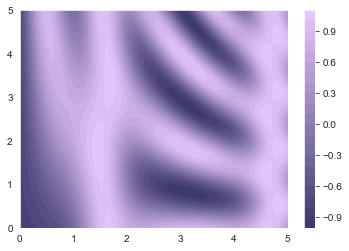

In [3]:
from matplotlib_style import cmap8
import numpy as np
import matplotlib.pyplot as plt
# データを作成する。

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 等高線を作成する。
fig, ax = plt.subplots()
c = ax.contourf(X, Y, Z, 20, cmap=cmap8)
fig.colorbar(c)

plt.show()

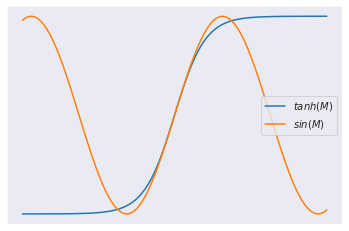

In [11]:
x = np.linspace(-5, 5, 100)
y1 = 2*np.tanh(x)
y2 = 2 * np.sin(x)

plt.figure(facecolor="#FFFFFF", edgecolor="#FFFFFF")
plt.plot(x, y1, label=r"$tanh(M)$")
plt.plot(x, y2, label=r"$sin(M)$")
plt.yticks([],[])
plt.xticks([],[])
plt.legend()